In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline
import random

In [ ]:
np.random_seed(10)

In [ ]:
def get_dataset(dir_path):
    img_size = (32, 32) #image size for resizing

    # Get the list of folder names in the data directory
    label_names = os.listdir(dir_data)

    # Create an empty list to store the images and labels
    data = []
    labels = []

    # Loop over the folder names
    for label_name in label_names:
        # Get the path to the folder
        label_dir = os.path.join(dir_data, label_name)

        # Loop over the files in the folder
        for file_name in os.listdir(label_dir):
            # Get the path to the file
            img_path = os.path.join(label_dir, file_name)

            # Load the image and resize it
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)

            # Add the image and label to the data list
            data.append(img)
            labels.append(int(label_name))

    # Convert the data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [ ]:
# Path to the directory containing the image folders for train datasets
dir_data = "./digits_img/train"

X_train, y_train = get_dataset(dir_data)

# Print the shape of the data and labels
print("Data shape:", X_train.shape)
print("Labels shape:", y_train.shape)

Data shape: (1000, 32, 32)
Labels shape: (1000,)


In [ ]:
# Path to the directory containing the image folders for test(val) datasets
dir_data = "./digits_img/val"

X_test, y_test = get_dataset(dir_data)

# Print the shape of the data and labels
print("Data shape:", X_test.shape)
print("Labels shape:", y_test.shape)

Data shape: (178, 32, 32)
Labels shape: (178,)


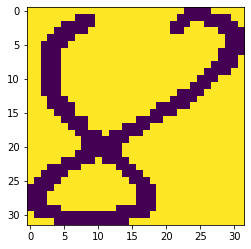

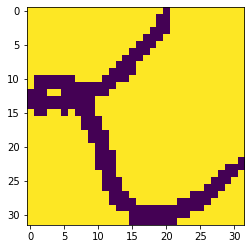

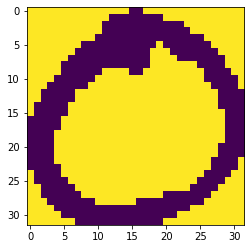

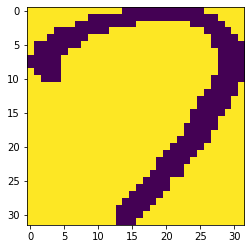

In [ ]:
# plot the digits
# Define the number of images to show
num_images = 4
# Loop over the images
for i in range(num_images):
    # Get the current image
    img = random.choice(X_train)
    
    # Show the image with the corresponding label as the title
    plt.imshow(img)
    plt.show();

In [ ]:
# Normalize data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
y_train[0]

0

In [ ]:
# creating model
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(32,32)))
model.add(tf.keras.layers.Dense(178, activation='relu'))
model.add(tf.keras.layers.Dense(10, input_shape = (178,), activation='sigmoid'))

In [ ]:
# complie the model 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 1.4923 - accuracy: 0.6750
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.5162 - accuracy: 0.9210
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 0.2905 - accuracy: 0.9450
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.2178 - accuracy: 0.9590
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.1661 - accuracy: 0.9680
Epoch 6/10
32/32 [==============================] - 0s 10ms/step - loss: 0.1342 - accuracy: 0.9770
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 0.1117 - accuracy: 0.9820
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0902 - accuracy: 0.9880
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0811 - accuracy: 0.9860
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0680 - accuracy: 0.9900


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test) 

6/6 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.9438


In [ ]:
model.save('gurnukhi-handwritten')

INFO:tensorflow:Assets written to: gurnukhi-handwritten\assets


INFO:tensorflow:Assets written to: gurnukhi-handwritten\assets


In [ ]:
model = tf.keras.models.load_model('gurnukhi-handwritten')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.9438


In [ ]:
print(loss)
print(accuracy)

0.24255214631557465
0.9438202381134033


In [ ]:
y_predict = model.predict(X_test)

6/6 [==============================] - 0s 15ms/step


In [ ]:
y_predict[0]

array([0.95194596, 0.41089448, 0.26753327, 0.13980487, 0.26337457,
       0.34492972, 0.09599872, 0.2671435 , 0.5459239 , 0.2161597 ],
      dtype=float32)

In [ ]:
np.argmax(y_predict[0]) # correct prediction

0

For test label 0, predicted value is 0


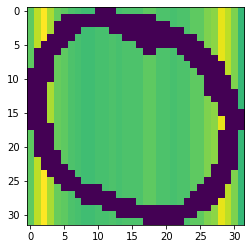

------------------------------------------------------------------------------------------
For test label 4, predicted value is 3


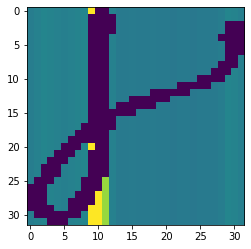

------------------------------------------------------------------------------------------
For test label 6, predicted value is 6


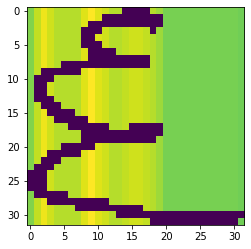

------------------------------------------------------------------------------------------
For test label 0, predicted value is 0


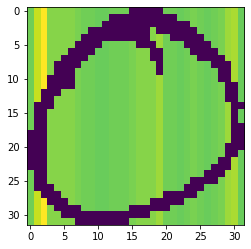

------------------------------------------------------------------------------------------
For test label 8, predicted value is 8


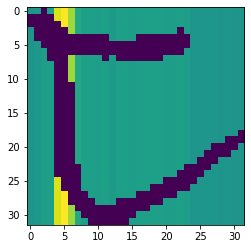

------------------------------------------------------------------------------------------
For test label 6, predicted value is 6


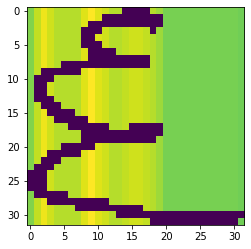

------------------------------------------------------------------------------------------
For test label 0, predicted value is 0


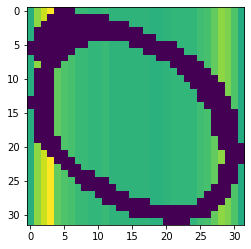

------------------------------------------------------------------------------------------
For test label 9, predicted value is 9


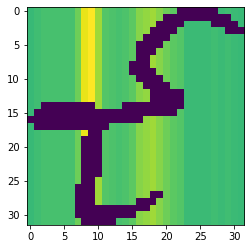

------------------------------------------------------------------------------------------
For test label 6, predicted value is 6


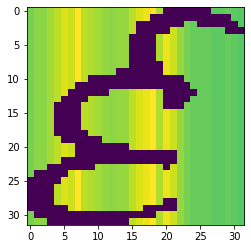

------------------------------------------------------------------------------------------
For test label 2, predicted value is 2


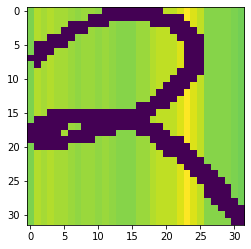

------------------------------------------------------------------------------------------


In [ ]:
# lets predict some random images

for i in range(10):
    # Get a random index of the list
    random_index = random.randint(0, len(y_predict) - 1)
    print(f"For test label {y_test[random_index]}, predicted value is {np.argmax(y_predict[random_index])}")
    img = X_test[random_index]
    plt.imshow(img)
    plt.show();
    print("--"*45)


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:6]

[0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:6]

array([0, 0, 0, 0, 0, 0])

In [ ]:
# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

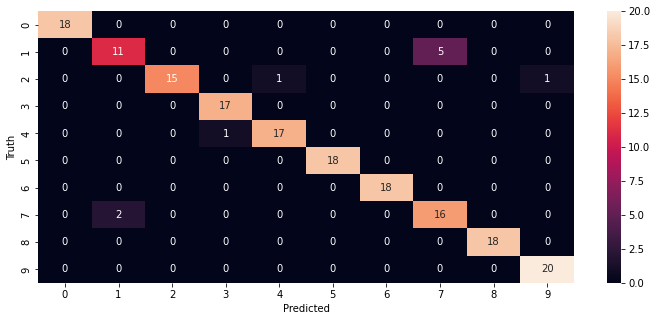

In [ ]:
import seaborn as sn
plt.figure(figsize = (12,5))
sn.heatmap(conf_mat, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');